In [1]:
!pip install folium

In [2]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/Maplub/accident_sample_bkk/main/event2019_BKK.csv')

In [3]:
data

,title,latitude,longitude
0,อุบัติเหตุ ถนนรัชดาภิเษก ขาเข้า,13.756988,100.565255
1,อุบัติเหตุ ถนนทางรถไฟเก่าสายปากน้ำ,13.717649,100.565232
2,อุบัติเหตุ ถนนเจริญกรุง ขาเข้า,13.728361,100.515878
3,อุบัติเหตุ กรุงเทพมหานคร,13.753568,100.580294
4,อุบัติเหตุ แยกคลองเตย,13.720805,100.557668
...,...,...,...
3061,อุบัติเหตุ ถนนเพชรบุรี,13.749695,100.548232
3062,อุบัติเหตุ ห้วยขวาง กรุงเทพมหานคร,13.753643,100.580295
3063,อุบัติเหตุ ห้วยขวาง กรุงเทพมหานคร,13.753630,100.580293
3064,อุบัติเหตุ เจริญรัถ 8 (ซอยอยู่ดี),13.704420,100.516291


In [4]:
import folium as fo
longitude =  100.5538272857666
latitude = 13.734465925243732
station_map = fo.Map(
                location = [latitude, longitude], 
                zoom_start = 14)
latitudes = list(data.latitude)
longitudes = list(data.longitude)
labels = list(data.title)

for lat, lng, label in zip(latitudes, longitudes, labels):
    fo.Circle(
      location = [lat, lng],
      radius = 1,
      color = 'red' 
     ).add_to(station_map)
station_map

In [5]:
latitudes = list(data.latitude)
longitudes = list(data.longitude)
points = []
for i in range(len(latitudes)):
  points += [[latitudes[i],longitudes[i]]]
print(points)

[[13.756988218879002, 100.56525483726999], [13.717649327196, 100.5652320385], [13.728361123638999, 100.51587805152], [13.7535676, 100.5802941], [13.72080481111, 100.55766820908], [13.719741696578, 100.51072686910999], [13.754416808514, 100.52837044001], [13.744954192015, 100.53760394454001], [13.737294194937999, 100.53922265768], [13.735918495471001, 100.58813139796], [13.743862527462001, 100.54396614432], [13.747401951199999, 100.56307420135], [13.751474111232, 100.53674697876], [13.739278400000002, 100.5835476], [13.760319052814, 100.56091074189], [13.712301062913001, 100.55276647209999], [13.753620890056, 100.56311711669001], [13.706913589498999, 100.54798543453], [13.75351928325, 100.56335315108], [13.719453443187001, 100.52304692566], [13.760181076544, 100.56699317109002], [13.745515329064, 100.59701386839001], [13.720682344730001, 100.55772721767], [13.742045246428, 100.59734746813999], [13.7535981, 100.5802797], [13.7535981, 100.5802797], [13.7536077, 100.5802921], [13.708140928

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

value = []
max = -100
key = -100
for i in range(3,100):
  n_clusters=i
  kmeans = KMeans(n_clusters=n_clusters)
  kmeans.fit(points)
  cluster_labels = kmeans.labels_
  SS = kmeans.inertia_ #Sum of squared distances of samples to their closest cluster center.
  silhouette_avg = silhouette_score(points, cluster_labels)
  value += [silhouette_avg]
  if silhouette_avg > max:
    max = silhouette_avg
    key = i
print(key)

97


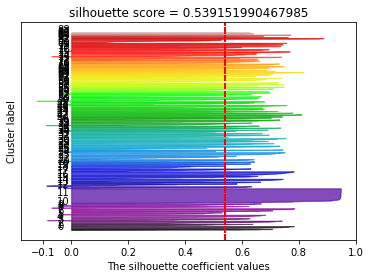

In [7]:
n_clusters=89
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(points)
cluster_labels = kmeans.labels_
SS = kmeans.inertia_ #Sum of squared distances of samples to their closest cluster center.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_avg = silhouette_score(points, cluster_labels)
sample_silhouette_values = silhouette_samples(points, cluster_labels)
import matplotlib.cm as cm
fig, ax = plt.subplots()
y_lower = 10
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
          0, ith_cluster_silhouette_values,
          facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

    ax.set_title("silhouette score = " + str(silhouette_avg))
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax.set_yticks([])  # Clear the yaxis labels / ticks
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

In [9]:
data['cluster'] = kmeans.labels_
data.head

<bound method NDFrame.head of                                    title   latitude   longitude  cluster
0        อุบัติเหตุ ถนนรัชดาภิเษก ขาเข้า  13.756988  100.565255       21
1     อุบัติเหตุ ถนนทางรถไฟเก่าสายปากน้ำ  13.717649  100.565232       19
2         อุบัติเหตุ ถนนเจริญกรุง ขาเข้า  13.728361  100.515878       87
3               อุบัติเหตุ กรุงเทพมหานคร  13.753568  100.580294       12
4                  อุบัติเหตุ แยกคลองเตย  13.720805  100.557668       34
...                                  ...        ...         ...      ...
3061              อุบัติเหตุ ถนนเพชรบุรี  13.749695  100.548232       79
3062   อุบัติเหตุ ห้วยขวาง กรุงเทพมหานคร  13.753643  100.580295       12
3063   อุบัติเหตุ ห้วยขวาง กรุงเทพมหานคร  13.753630  100.580293       12
3064   อุบัติเหตุ เจริญรัถ 8 (ซอยอยู่ดี)  13.704420  100.516291       29
3065              อุบัติเหตุ ถนนกรุงเกษม  13.749151  100.516730       44

[3066 rows x 4 columns]>

In [10]:
data.groupby('cluster').mean()

,latitude,longitude
cluster,,
0,13.707423,100.548013
1,13.748496,100.569365
2,13.711415,100.583740
3,13.730122,100.536356
4,13.759703,100.543639
...,...,...
94,13.755097,100.524538
95,13.711690,100.566707
96,13.724349,100.560896


In [11]:
latitudes = list(data.groupby('cluster').mean()['latitude'])
longitudes = list(data.groupby('cluster').mean()['longitude'])

In [13]:
import folium
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

longitude =  100.5538272857666
latitude = 13.734465925243732
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=14)

# set color scheme for the clusters
x = np.arange(4)
ys = [i + x + (i*x)**2 for i in range(4)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.vector_layers.CircleMarker(
      location = [lat, lng],
      radius = 10,
      tooltip = 'cluster',
        fill=True,
        fill_opacity=0.9).add_to(map_clusters)
map_clusters